# Intepretation

In [1]:
import classifiers as clf

import pandas as pd
import pickle

import matplotlib.pyplot as plt
import seaborn           as sns
sns.set_style("darkgrid")

from config import plotly_id, plotly_key
import plotly
import plotly_express as px
import plotly.plotly as py
plotly.tools.set_credentials_file(username=plotly_id, api_key=plotly_key)

### Load Estimators

In [2]:
imbalanced     = pd.read_pickle("../Data/imbalanced.pkl")
balanced_smote = pd.read_pickle("../Data/balanced_smote.pkl")
balanced_under = pd.read_pickle("../Data/balanced_under.pkl")
y_labels       = pd.read_pickle("../Data/y_labels.pkl")

In [3]:
# all models
all_models = pd.concat([imbalanced, balanced_smote, balanced_under], ignore_index=True)
all_models.sort_values(by=['F1 Score','Accuracy'], ascending=False).head()

,Balance,Classifier,Parameters,Split,Accuracy,Precision,Recall,F1 Score,Fit Time,Score Time,Total Time,Confusion Matrix
751,SMOTE Oversampled,K Nearest Neighbors,"{'algorithm': 'kd_tree', 'leaf_size': 20, 'n_n...",Train,0.779396,0.802677,0.779396,0.779863,0.490097,36.299761,36.789857,NaN
731,SMOTE Oversampled,K Nearest Neighbors,"{'algorithm': 'kd_tree', 'leaf_size': 10, 'n_n...",Train,0.778964,0.802116,0.778964,0.779404,0.483264,44.232831,44.716095,NaN
691,SMOTE Oversampled,K Nearest Neighbors,"{'algorithm': 'ball_tree', 'leaf_size': 20, 'n...",Train,0.778857,0.802423,0.778857,0.779333,0.642077,73.347347,73.989424,NaN
671,SMOTE Oversampled,K Nearest Neighbors,"{'algorithm': 'ball_tree', 'leaf_size': 10, 'n...",Train,0.778641,0.802062,0.778641,0.779079,0.666548,73.815845,74.482394,NaN
749,SMOTE Oversampled,K Nearest Neighbors,"{'algorithm': 'kd_tree', 'leaf_size': 20, 'n_n...",Train,0.778101,0.801112,0.778101,0.778513,0.511232,31.419465,31.930697,NaN


In [4]:
all_models.describe()

,Accuracy,Precision,Recall,F1 Score,Fit Time,Score Time,Total Time
count,1824.000000,1824.000000,1824.000000,1824.000000,1824.000000,1824.000000,1824.000000
mean,0.541899,0.387432,0.438733,0.384735,1.723045,5.563793,7.286838
std,0.159712,0.196164,0.118567,0.160503,9.827929,15.914255,18.384895
min,0.169863,0.056621,0.316637,0.096799,0.003476,0.003738,0.007510
25%,0.409064,0.235160,0.333333,0.275770,0.080572,0.069414,0.289020
50%,0.464520,0.374686,0.414887,0.353471,0.351511,0.190303,0.717209
75%,0.705479,0.529797,0.488581,0.473276,0.623161,0.496737,2.567146
max,0.779396,0.822644,0.779396,0.779863,190.658483,79.253798,190.722181


In [5]:
# best estimators of test sets
best_estimators = pd.concat([
    imbalanced[    imbalanced[    'Split'] == 'Test'],
    balanced_smote[balanced_smote['Split'] == 'Test'],
    balanced_under[balanced_under['Split'] == 'Test']],
    ignore_index=True)

# best_estimators
best_estimators.sort_values(by=['F1 Score','Accuracy'], ascending=False)

,Balance,Classifier,Parameters,Split,Accuracy,Precision,Recall,F1 Score,Fit Time,Score Time,Total Time,Confusion Matrix
3,Imbalanced,K Nearest Neighbors,"{'algorithm': 'ball_tree', 'leaf_size': 10, 'n...",Test,0.774429,0.668664,0.599096,0.625391,0.243199,18.589841,18.833041,"[[701, 25, 43], [68, 54, 18], [78, 15, 93]]"
1,Imbalanced,Logistic Regression,"{'C': 1000000.0, 'fit_intercept': True, 'multi...",Test,0.747945,0.628553,0.546944,0.574400,22.218980,0.048634,22.267614,"[[702, 34, 33], [61, 56, 23], [116, 9, 61]]"
2,Imbalanced,Multinomial Naive Bayes,"{'alpha': 0.6, 'fit_prior': True}",Test,0.731507,0.604520,0.547882,0.566858,0.051409,0.035432,0.086840,"[[678, 54, 37], [70, 57, 13], [104, 16, 66]]"
8,SMOTE Oversampled,Logistic Regression,"{'C': 1000000000000.0, 'fit_intercept': True, ...",Test,0.670320,0.545435,0.589809,0.561375,190.658483,0.063698,190.722181,"[[567, 94, 108], [36, 76, 28], [74, 21, 91]]"
6,Imbalanced,Ada Boost,"{'learning_rate': 1.0, 'n_estimators': 350}",Test,0.737900,0.604464,0.530898,0.555372,8.640973,1.101502,9.742475,"[[698, 28, 43], [69, 53, 18], [111, 18, 57]]"
9,SMOTE Oversampled,Multinomial Naive Bayes,"{'alpha': 0.0, 'fit_prior': True}",Test,0.649315,0.526188,0.567792,0.540605,0.113059,0.053065,0.166124,"[[552, 110, 107], [47, 74, 19], [83, 18, 85]]"
13,SMOTE Oversampled,Ada Boost,"{'learning_rate': 1.0, 'n_estimators': 250}",Test,0.611872,0.508410,0.569268,0.520271,13.073381,1.468999,14.542379,"[[499, 112, 158], [31, 79, 30], [58, 36, 92]]"
10,SMOTE Oversampled,K Nearest Neighbors,"{'algorithm': 'kd_tree', 'leaf_size': 20, 'n_n...",Test,0.637443,0.502445,0.535481,0.513067,0.490097,36.299761,36.789857,"[[553, 85, 131], [46, 61, 33], [69, 33, 84]]"
17,Near Miss Undersampled,K Nearest Neighbors,"{'algorithm': 'kd_tree', 'leaf_size': 30, 'n_n...",Test,0.536073,0.483936,0.551812,0.475714,0.049854,2.514521,2.564374,"[[395, 120, 254], [42, 62, 36], [35, 21, 130]]"
12,SMOTE Oversampled,Random Forest,"{'criterion': 'entropy', 'max_depth': 4, 'max_...",Test,0.592694,0.514857,0.513655,0.465644,0.630466,0.276679,0.907144,"[[517, 215, 37], [44, 90, 6], [80, 64, 42]]"


In [6]:
best_estimators.describe()

,Accuracy,Precision,Recall,F1 Score,Fit Time,Score Time,Total Time
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,0.541422,0.420602,0.465755,0.409970,11.602972,2.927354,14.530325
std,0.185107,0.171465,0.103915,0.152559,41.418687,8.641502,41.542172
min,0.169863,0.056621,0.318236,0.096799,0.003476,0.004214,0.007690
25%,0.409132,0.328791,0.333333,0.289632,0.033671,0.031604,0.046408
50%,0.592694,0.453131,0.506758,0.439823,0.113059,0.053065,0.268237
75%,0.702283,0.526188,0.547882,0.540605,0.630466,0.638145,9.742475
max,0.774429,0.668664,0.599096,0.625391,190.658483,36.299761,190.722181


### Quality Metrics

In [7]:
# plot accuracy
accuracy = best_estimators.pivot(index='Classifier',columns='Balance',values='Accuracy')
accuracy = accuracy[['Imbalanced', 'SMOTE Oversampled', 'Near Miss Undersampled']]
accuracy

Balance,Imbalanced,SMOTE Oversampled,Near Miss Undersampled
Classifier,,,
Ada Boost,0.737900,0.611872,0.393607
Decision Tree,0.702283,0.169863,0.169863
Dummy,0.536986,0.331507,0.332420
K Nearest Neighbors,0.774429,0.637443,0.536073
Logistic Regression,0.747945,0.670320,0.409132
Multinomial Naive Bayes,0.731507,0.649315,0.432877
Random Forest,0.702283,0.592694,0.499543


In [8]:
# plot F1 scores
f1_scores = best_estimators.pivot(index='Classifier',columns='Balance',values='F1 Score')
f1_scores = f1_scores[['Imbalanced', 'SMOTE Oversampled', 'Near Miss Undersampled']]
f1_scores

Balance,Imbalanced,SMOTE Oversampled,Near Miss Undersampled
Classifier,,,
Ada Boost,0.555372,0.520271,0.365476
Decision Tree,0.275036,0.096799,0.096799
Dummy,0.318091,0.281356,0.289632
K Nearest Neighbors,0.625391,0.513067,0.475714
Logistic Regression,0.574400,0.561375,0.380903
Multinomial Naive Bayes,0.566858,0.540605,0.391722
Random Forest,0.275036,0.465644,0.439823


(0, 1)

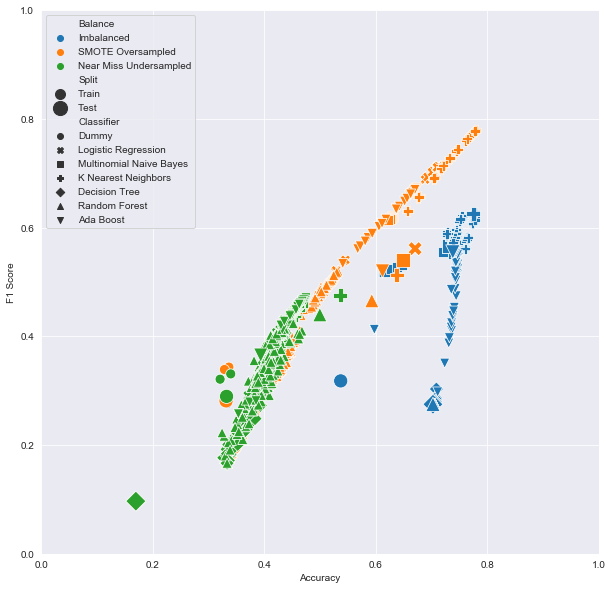

In [9]:
# pareto chart of classifier quality metrics
fig, az = plt.subplots(figsize=(10,10))
sns.scatterplot(x="Accuracy",
                y="F1 Score",
                hue='Balance',
                size='Split',
                sizes=[100,200],
                style='Classifier',
                data=all_models)
az.set_xlim(0,1)
az.set_ylim(0,1)

(0, 1)

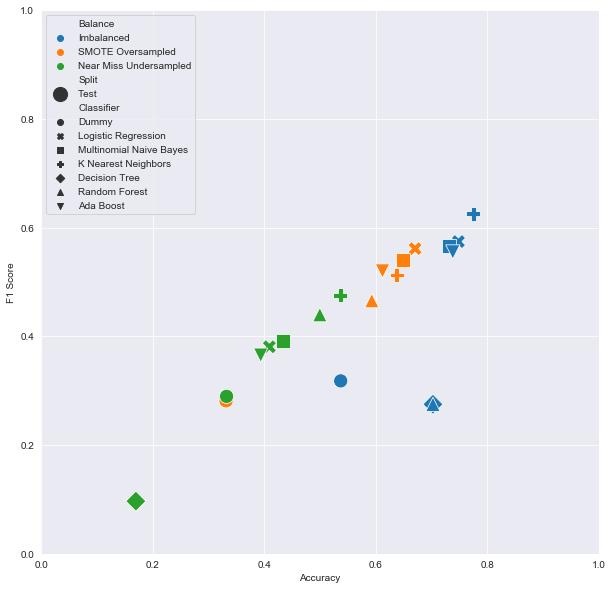

In [10]:
# pareto chart of classifier quality metrics
fig, az = plt.subplots(figsize=(10,10))
sns.scatterplot(x="Accuracy",
                y="F1 Score",
                hue='Balance',
                size='Split',
                sizes=[200],
                style='Classifier',
                data=best_estimators)
az.set_xlim(0,1)
az.set_ylim(0,1)

In [11]:
# classifier quality
all_models['Size']   = all_models['Split'].apply(lambda x: 2 if x == 'Test' else 1)
all_models['Params'] = all_models['Parameters'].apply(
    lambda x: ''.join('<br>{}: {}'.format(k.title(),v) for k,v in x.items()))

fig = px.scatter(all_models,
                 x='Accuracy',
                 y='F1 Score',
                 symbol='Balance',
                 color='Classifier',
                 size='Size',
                 range_x=[0,1],
                 range_y=[0,1],
                 hover_name='Split',
                 hover_data=['Precision','Recall',
                             'Fit Time','Score Time','Total Time',
                             'Params',])
py.iplot(fig, filename='endangered-species-quality')

/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



### Confusion Matrix

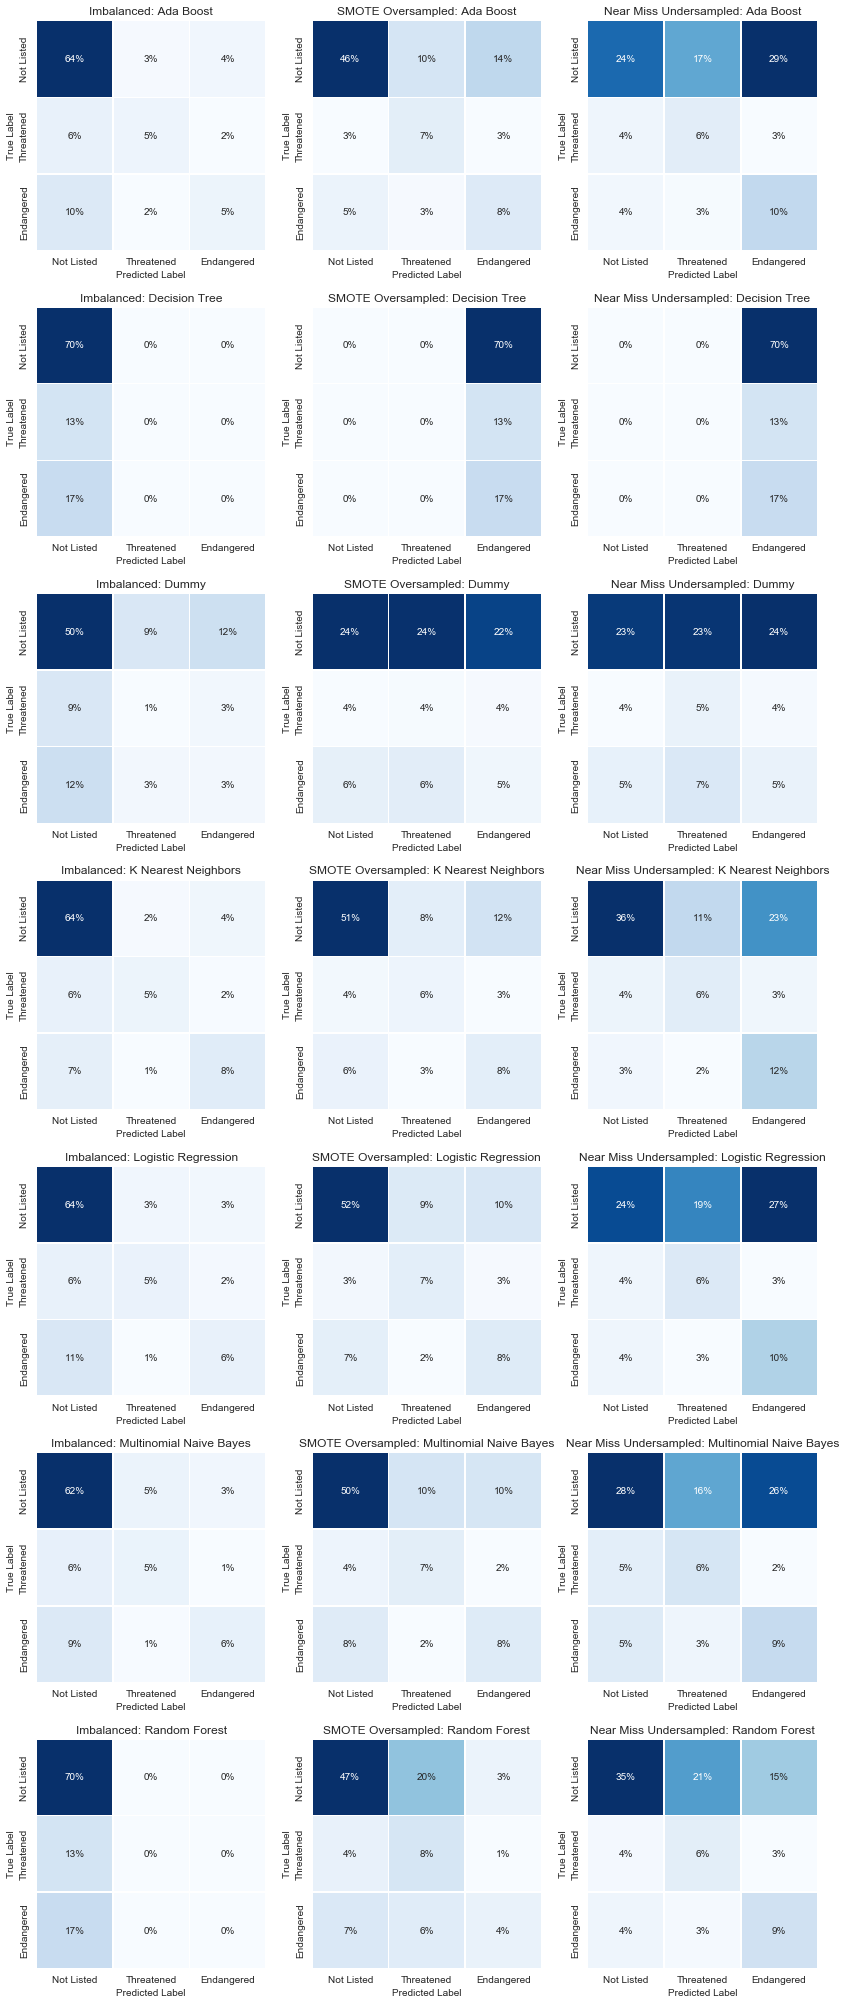

In [12]:
# plot confusion matrices
confusion_matrices = best_estimators.pivot(index='Classifier',columns='Balance',values='Confusion Matrix')
confusion_matrices = confusion_matrices[['Imbalanced', 'SMOTE Oversampled', 'Near Miss Undersampled']]
cm, axes = clf.plot_confusion_matrices(confusion_matrices, list(y_labels[0]))

### Efficiency Metrics

[None, None]

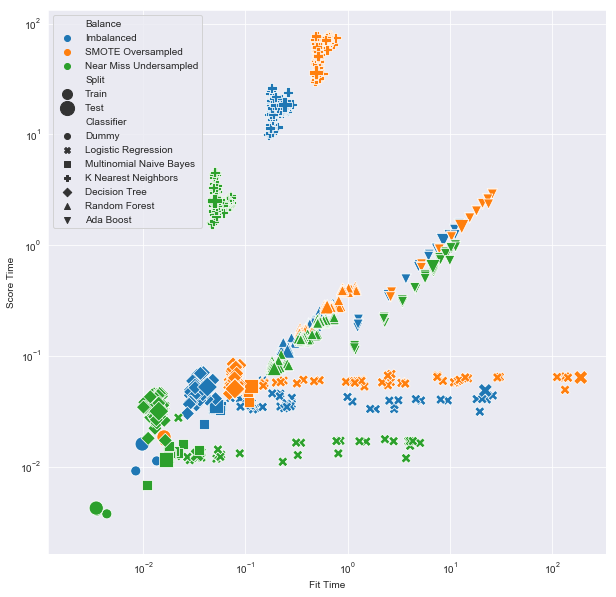

In [13]:
# pareto chart of classifier performance metrics
fig, az = plt.subplots(figsize=(10,10))
sns.scatterplot(x="Fit Time",
                y="Score Time",
                hue='Balance',
                size='Split',
                sizes=[100,200],
                style='Classifier',
                data=all_models)
az.set(xscale="log", yscale="log")

[None, None]

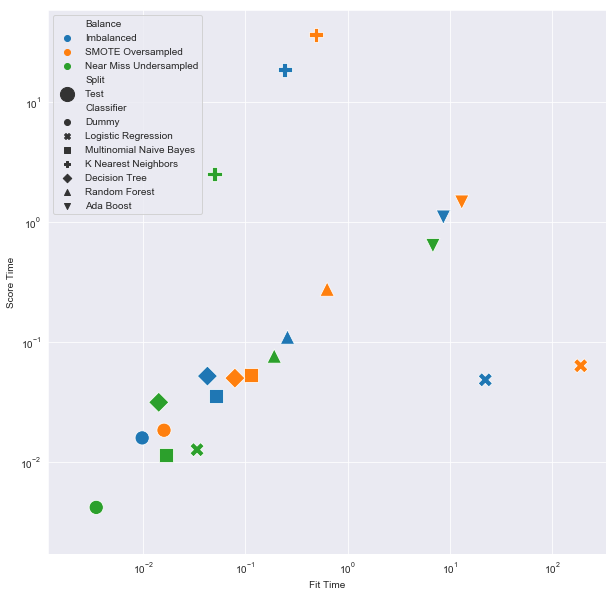

In [14]:
# pareto chart of classifier performance metrics
fig, az = plt.subplots(figsize=(10,10))
sns.scatterplot(x="Fit Time",
                y="Score Time",
                hue='Balance',
                size='Split',
                sizes=[200],
                style='Classifier',
                data=best_estimators)
az.set(xscale="log", yscale="log")

In [15]:
# efficiency
fig = px.scatter(all_models,
                 x='Fit Time',
                 y='Score Time',
                 symbol='Balance',
                 color='Classifier',
                 size='Size',
                 range_x=[0.01,20],
                 log_x=True,
                 range_y=[0.01,40],
                 log_y=True,
                 hover_name='Split',
                 hover_data=['Accuracy', 'Precision','Recall', 'F1 Score',
                             'Total Time',
                             'Params'])
py.iplot(fig, filename='endangered-species-efficiency')

/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



### Quality and Efficiency Trade-Off

[None]

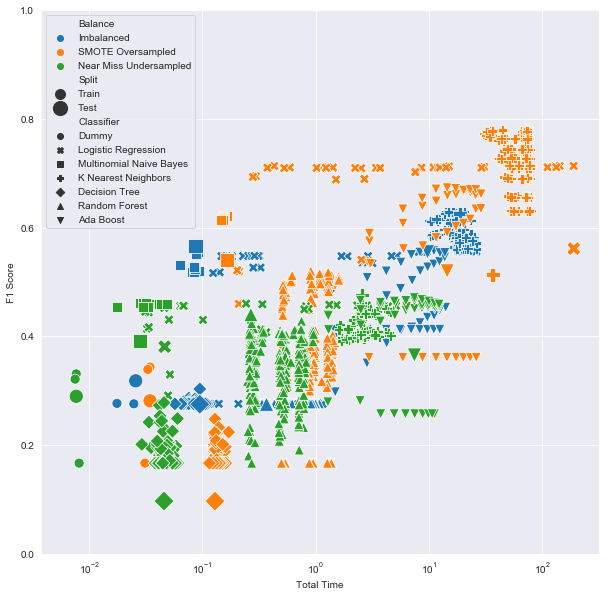

In [16]:
# pareto chart of classifier quality and efficiency trade-off
fig, az = plt.subplots(figsize=(10,10))
sns.scatterplot(x="Total Time",
                y="F1 Score",
                hue='Balance',
                size='Split',
                sizes=[100,200],
                style='Classifier',
                data=all_models)
az.set_ylim(0,1)
az.set(xscale="log")

[None]

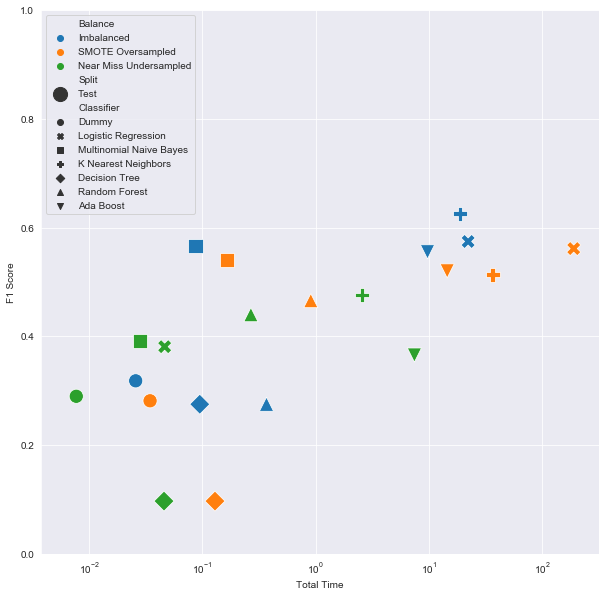

In [17]:
# pareto chart of classifier quality and efficiency trade-off
fig, az = plt.subplots(figsize=(10,10))
sns.scatterplot(x="Total Time",
                y="F1 Score",
                hue='Balance',
                size='Split',
                sizes=[200],
                style='Classifier',
                data=best_estimators)
az.set_ylim(0,1)
az.set(xscale="log")

In [18]:
# pareto chart of classifier quality and efficiency trade-off
best_estimators['Params'] = best_estimators['Parameters'].apply(
    lambda x: ''.join('<br>{}: {}'.format(k.title(),v) for k,v in x.items()))

fig = px.scatter(best_estimators,
                 x='Total Time',
                 y='F1 Score',
                 symbol='Balance',
                 color='Classifier',
                 range_x=[0.01,20],
                 log_x=True,
                 range_y=[0,1],
                 hover_name='Classifier',
                 hover_data=['Accuracy', 'Precision','Recall',
                             'Fit Time','Score Time',
                             'Params'])
py.iplot(fig, filename='endangered-species-tradeoff')

/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



### Feature Importance

In [19]:
best_estimators[1].best_estimator_.coef_[0]

KeyError: 1

In [ ]:
best_log_params = list(zip(X.columns, grid_searches[0]['Classifier'].best_estimator_.coef_[0]))
best_log_params.sort(key = lambda x: abs(x[1]), reverse=True)
best_log_params

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline  

# Rearrange feature names so they match the sorted feature importances
model_features = [i[0] for i in best_log_params]

feature_weights = [abs(i[1]) for i in best_log_params]

# Create plot
plt.figure(figsize=(10,6))

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(model_features, feature_weights)

# Add feature names as x-axis labels
# plt.xticks(range(X.shape[1]), names, rotation=90)
plt.xticks(rotation=90)

# Show plot
plt.show()